# DAT 203 - Lab Assignment #8

- Author: Colin Bowers
- Date: July 8, 2023

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk 

1. Import the dataset and run a complete analysis of it.
    1. Your target is column name “gnd”
1. Split the data into training and testing
1. Apply any feature selection algorithm and choose the best features.
1. Use any classifier and report the accuracy 
1. Apply PCA dimensionality reduction technique to the original data. 
1. Plot a 2-dimensional representation of the data based on the first and second principal components, explain the results versus the known classes (display each class with a different color). 
1. Repeat step 6 for the 20th and 21st components and comment on the result
1. Plot a 2-dimensional representation of the original data using t-SNE, compare the output with PCA’s output in Step 6 and 7, and explain the results versus the known classes.
1. Use the any classifier to classify 6 sets of dimensionality reduced data (using 2, 4, 10, 30, 40, 256 PCA components). [plot these showing the error]
1. Plot the classification error for the 6 sets and the number of chosen components. 


In [2]:
df = pd.read_csv("data/Data.csv")
df.shape

(800, 258)

In [3]:
df.sample(5)

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
190,191,-1.000000,-0.999998,-0.999809,-0.996089,-0.970433,-0.884808,-0.690711,-0.319939,0.061145,...,0.455197,0.486461,0.339964,0.043967,-0.348700,-0.717147,-0.928793,-0.991219,-0.999476,0
31,32,-1.000000,-0.999997,-0.999734,-0.992537,-0.918866,-0.642963,-0.178492,0.070579,-0.301935,...,0.460490,0.247884,-0.104805,-0.498261,-0.835439,-0.975208,-0.998513,-0.999955,-0.999999,0
755,756,-0.999953,-0.995781,-0.924779,-0.594565,-0.080936,0.078328,0.018000,-0.062777,-0.196795,...,0.325123,0.184704,-0.238686,-0.647154,-0.907501,-0.990503,-0.999632,-0.999996,-1.000000,3
556,557,-0.991890,-0.945921,-0.837954,-0.719624,-0.533209,-0.138861,0.340141,0.506389,0.428437,...,0.163368,-0.023436,-0.417702,-0.786600,-0.955755,-0.995528,-0.999817,-0.999998,-1.000000,2
127,128,-0.999928,-0.998200,-0.980897,-0.904341,-0.736774,-0.531576,-0.373968,-0.339330,-0.418325,...,-0.535689,-0.502219,-0.506174,-0.559224,-0.653241,-0.790457,-0.927269,-0.986024,-0.998154,0


In [4]:
df.gnd.value_counts()

0    200
1    200
2    200
3    200
Name: gnd, dtype: int64

In [5]:
df.describe()

,Unnamed: 0,fea.1,fea.2,fea.3,fea.4,fea.5,fea.6,fea.7,fea.8,fea.9,...,fea.248,fea.249,fea.250,fea.251,fea.252,fea.253,fea.254,fea.255,fea.256,gnd
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,...,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,-0.991409,-0.968831,-0.917406,-0.820467,-0.676586,-0.495195,-0.266342,-0.080204,-0.153667,...,-0.108339,-0.139846,-0.371067,-0.597333,-0.743848,-0.838149,-0.901319,-0.945590,-0.977662,1.500000
std,231.0844,0.047754,0.118036,0.207387,0.309470,0.411327,0.467895,0.448563,0.419555,0.429422,...,0.467927,0.478690,0.457282,0.420004,0.352270,0.289812,0.231492,0.166216,0.088638,1.118733
min,1.0000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,200.7500,-1.000000,-1.000000,-1.000000,-0.999894,-0.993603,-0.931390,-0.650477,-0.281856,-0.429037,...,-0.371477,-0.502065,-0.774185,-0.961959,-0.995128,-0.999893,-1.000000,-1.000000,-1.000000,0.750000
50%,400.5000,-1.000000,-0.999974,-0.998744,-0.984838,-0.885552,-0.636180,-0.266676,0.015629,-0.080399,...,0.007508,-0.005553,-0.409065,-0.754701,-0.924648,-0.981403,-0.997410,-0.999896,-0.999998,1.500000
75%,600.2500,-0.999922,-0.996333,-0.953919,-0.762624,-0.450571,-0.080921,0.125815,0.232491,0.184588,...,0.261937,0.231008,0.020544,-0.319118,-0.606411,-0.819666,-0.943618,-0.991112,-0.999377,2.250000
max,800.0000,-0.342725,0.112006,0.367011,0.468162,0.523140,0.527240,0.530853,0.531079,0.531191,...,0.526726,0.529774,0.531124,0.526003,0.489672,0.505559,0.469148,0.168234,-0.230614,3.000000


## Feature Selection 

## Train a model

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
target = "gnd"
predictors = list(df.columns)
predictors.remove(target)
len(predictors)

257

In [8]:
train, test = train_test_split(df, test_size=0.2)

X_train = train[predictors]
y_train = train[target]

X_test = test[predictors]
y_test = test[target]


In [9]:
model = DecisionTreeClassifier(random_state=0)
model = model.fit(X_train, y_train)

In [10]:
y_pred = model.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98        30
           1       1.00      0.98      0.99        46
           2       1.00      1.00      1.00        43
           3       1.00      1.00      1.00        41

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



In [11]:
mat = metrics.confusion_matrix(y_pred, y_test)
print(mat)

[[30  1  0  0]
 [ 0 45  0  0]
 [ 0  0 43  0]
 [ 0  0  0 41]]


## PCA dimensionality reduction

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA()
pca.fit(df)
data_pca = pca.transform(df)
#data_pca = pd.DataFrame(data_pca, columns=['PC1','PC2','PC3'])
data_pca = pd.DataFrame(data_pca)
data_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,248,249,250,251,252,253,254,255,256,257
0,399.523182,3.595635,-2.286983,-4.743175,-0.071901,-1.452248,0.622745,-2.101265,-0.003020,-0.063353,...,-0.002216,-0.001440,-0.000194,-0.000546,0.000786,0.000659,-0.000538,0.000043,-8.525766e-08,-1.790304e-07
1,398.507172,1.792523,1.494746,5.544355,2.201670,-2.025583,-0.149907,1.803985,1.626690,-1.046508,...,0.000536,0.000165,0.000086,0.000173,0.000879,0.000871,0.000418,0.000455,6.564687e-07,-3.788088e-08
2,397.537847,5.104711,1.294142,3.872070,-0.212130,0.769922,-1.967101,0.657551,-1.625670,0.422321,...,0.002988,-0.000597,0.000399,-0.002286,0.000668,0.000699,0.000026,0.000449,-3.286443e-07,-4.256785e-09
3,396.472193,-1.529832,-1.042982,5.778476,0.770318,-1.007435,2.496895,-1.777320,0.807821,-0.199964,...,0.001654,-0.001986,0.000910,0.000311,0.000112,0.000073,-0.000102,0.000118,2.050887e-09,-9.655415e-08
4,395.475906,-4.269743,-0.550341,2.636962,1.393901,-2.281051,0.713894,-0.075401,0.646000,-0.096715,...,0.000774,-0.001171,-0.002066,0.000984,0.000430,0.000633,-0.000116,0.000109,1.006521e-08,8.916677e-08


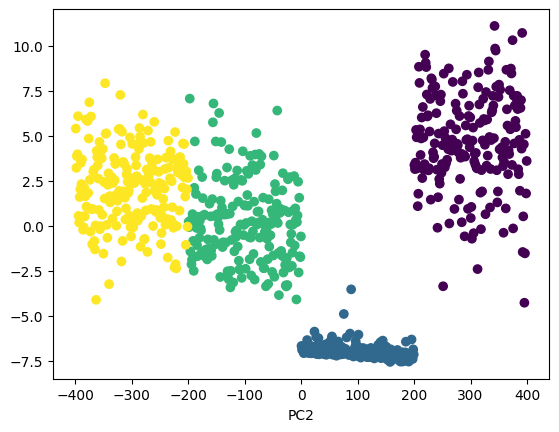

In [14]:
plt.scatter(data_pca[0], data_pca[1], c=df.gnd)
plt.xlabel("PC1")
plt.xlabel("PC2")
plt.show()

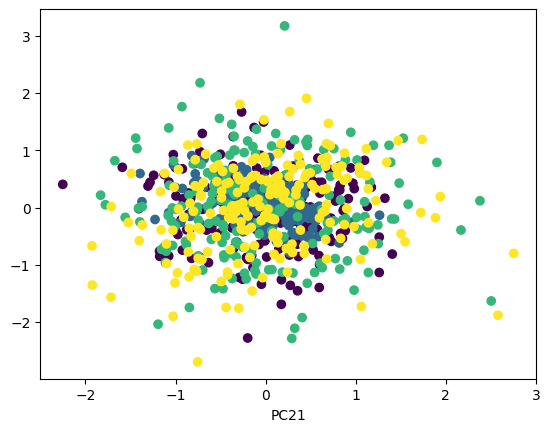

In [15]:
plt.scatter(data_pca[19], data_pca[20], c=df.gnd)
plt.xlabel("PC20")
plt.xlabel("PC21")
plt.show()

## Dimentionality Comparison

In [16]:
loop = [2, 4, 10, 30, 40, 256]
#loop = [2, 4, 10]
results = [ ]

for n in loop:

    p = PCA(n_components = n)
    p.fit(df)
    df_p = p.transform(df)
    df_p = pd.DataFrame(df_p)
    df_p["gnd"] = df["gnd"]

    train_p, test_p = train_test_split(df_p, test_size=0.2)

    X_train_p = train_p.iloc[:, 0:n]
    y_train_p = train_p["gnd"]

    X_test_p = test_p.iloc[:, 0:n]
    y_test_p = test_p["gnd"]

    m = DecisionTreeClassifier(random_state=0)
    m = model.fit(X_train_p, y_train_p)

    y_pred_p = m.predict(X_test_p)
    score = metrics.accuracy_score(y_test_p, y_pred_p)
    
    print(f"For n={n}: {len(df_p.columns)} columns, accuracy is {score}")
    
    results.append(score)

print("Done.")
print(results)

For n=2: 3 columns, accuracy is 1.0
For n=4: 5 columns, accuracy is 1.0
For n=10: 11 columns, accuracy is 1.0
For n=30: 31 columns, accuracy is 0.99375
For n=40: 41 columns, accuracy is 1.0
For n=256: 257 columns, accuracy is 1.0
Done.
[1.0, 1.0, 1.0, 0.99375, 1.0, 1.0]


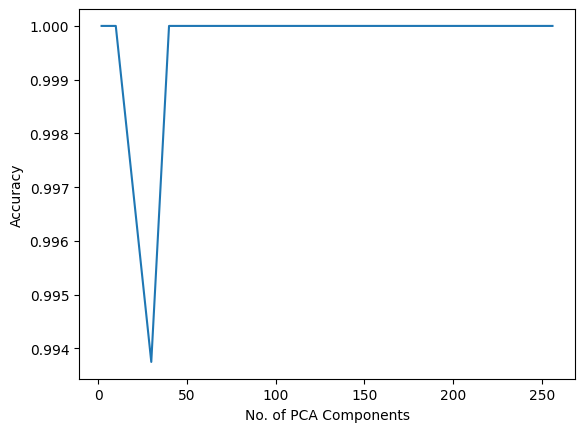

In [17]:
plt.plot(loop, results, "-")
plt.xlabel("No. of PCA Components")
plt.ylabel("Accuracy")
plt.show()